In [3]:
!pip install pycryptodome matplotlib


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import os
import time
import hashlib
from Crypto.Cipher import AES, PKCS1_OAEP
from Crypto.PublicKey import RSA
from Crypto.Signature import pkcs1_15
from Crypto.Random import get_random_bytes
import matplotlib.pyplot as plt

# AES Functions

In [5]:
def generate_aes_key(key_length):
    key = get_random_bytes(key_length // 8)
    with open(f'aes_key_{key_length}.key', 'wb') as f:
        f.write(key)
    return key

def aes_encrypt(data, key, mode):
    cipher = AES.new(key, mode)
    ciphertext = cipher.encrypt(data)
    with open('aes_encrypted.bin', 'wb') as f:
        f.write(ciphertext)
    return ciphertext

def aes_decrypt(ciphertext, key, mode):
    cipher = AES.new(key, mode)
    plaintext = cipher.decrypt(ciphertext)
    return plaintext

# RSA Functions

In [6]:
def generate_rsa_keys(bits):
    key = RSA.generate(bits)
    private_key = key.export_key()
    public_key = key.publickey().export_key()
    with open('rsa_private.pem', 'wb') as f:
        f.write(private_key)
    with open('rsa_public.pem', 'wb') as f:
        f.write(public_key)
    return private_key, public_key

def rsa_encrypt(data, public_key):
    cipher = PKCS1_OAEP.new(RSA.import_key(public_key))
    ciphertext = cipher.encrypt(data)
    with open('rsa_encrypted.bin', 'wb') as f:
        f.write(ciphertext)
    return ciphertext

def rsa_decrypt(ciphertext, private_key):
    cipher = PKCS1_OAEP.new(RSA.import_key(private_key))
    plaintext = cipher.decrypt(ciphertext)
    return plaintext

# RSA Signature Functions

def rsa_sign(data, private_key):
    key = RSA.import_key(private_key)
    h = hashlib.sha256(data).digest()
    signature = pkcs1_15.new(key).sign(h)
    with open('rsa_signature.sig', 'wb') as f:
        f.write(signature)
    return signature

def rsa_verify(data, signature, public_key):
    key = RSA.import_key(public_key)
    h = hashlib.sha256(data).digest()
    try:
        pkcs1_15.new(key).verify(h, signature)
        return True
    except (ValueError, TypeError):
        return False

# SHA-256 Hashing Function

In [7]:
def sha256_hash(data):
    return hashlib.sha256(data).hexdigest()

# Function to measure AES encryption time

In [8]:
def measure_aes_time(key_length, data, mode):
    key = get_random_bytes(key_length // 8)
    cipher = AES.new(key, mode)
    start_time = time.time()
    ciphertext = cipher.encrypt(data)
    end_time = time.time()
    return end_time - start_time

# Function to measure RSA encryption time

In [9]:
def measure_rsa_time(bits, data):
    key = RSA.generate(bits)
    public_key = key.publickey()
    cipher = PKCS1_OAEP.new(public_key)
    start_time = time.time()
    ciphertext = cipher.encrypt(data)
    end_time = time.time()
    return end_time - start_time

# Main Program

In [18]:
def main():
    while True:
        print("Choose a functionality:")
        print("1. AES Encryption/Decryption")
        print("2. RSA Encryption/Decryption")
        print("3. RSA Signature")
        print("4. SHA-256 Hashing")
        print("5. Exit")
        choice = int(input())
        
        if choice == 1:
            key_length = int(input("Enter AES key length (128 or 256): "))
            mode = AES.MODE_ECB if input("Enter mode (ECB/CFB): ") == 'ECB' else AES.MODE_CFB
            key = generate_aes_key(key_length)
            data = input("Enter data to encrypt (must be multiple of 16 bytes): ").encode()
            start_time = time.time()
            ciphertext = aes_encrypt(data, key, mode)
            print("Ciphertext:", ciphertext)
            decrypted_text = aes_decrypt(ciphertext, key, mode)
            print("Decrypted text:", decrypted_text)
            print("Execution time:", time.time() - start_time)
        
        elif choice == 2:
            bits = int(input("Enter RSA key size (e.g., 1024, 2048): "))
            private_key, public_key = generate_rsa_keys(bits)
            data = input("Enter data to encrypt: ").encode()
            start_time = time.time()
            ciphertext = rsa_encrypt(data, public_key)
            print("Ciphertext:", ciphertext)
            decrypted_text = rsa_decrypt(ciphertext, private_key)
            print("Decrypted text:", decrypted_text)
            print("Execution time:", time.time() - start_time)
        
        elif choice == 3:
            bits = int(input("Enter RSA key size for signature (e.g., 1024, 2048): "))
            private_key, public_key = generate_rsa_keys(bits)
            data = input("Enter data to sign: ").encode()
            start_time = time.time()
            signature = rsa_sign(data, private_key)
            print("Signature:", signature)
            verification = rsa_verify(data, signature, public_key)
            print("Verification:", "Success" if verification else "Failure")
            print("Execution time:", time.time() - start_time)
        
        elif choice == 4:
            data = input("Enter data to hash: ").encode()
            start_time = time.time()
            hash_value = sha256_hash(data)
            print("SHA-256 Hash:", hash_value)
            print("Execution time:", time.time() - start_time)
        
        elif choice == 5:
            break
        
        else:
            print("Invalid choice, please try again.")

if __name__ == "__main__":
    main()

Choose a functionality:
1. AES Encryption/Decryption
2. RSA Encryption/Decryption
3. RSA Signature
4. SHA-256 Hashing
5. Exit
SHA-256 Hash: ba7816bf8f01cfea414140de5dae2223b00361a396177a9cb410ff61f20015ad
Execution time: 0.0
Choose a functionality:
1. AES Encryption/Decryption
2. RSA Encryption/Decryption
3. RSA Signature
4. SHA-256 Hashing
5. Exit
SHA-256 Hash: 1571749614cbcf4f0a869838ced1c7c37d33a743a702a1abcb7696359bcf4a27
Execution time: 0.0
Choose a functionality:
1. AES Encryption/Decryption
2. RSA Encryption/Decryption
3. RSA Signature
4. SHA-256 Hashing
5. Exit


ValueError: invalid literal for int() with base 10: ''

# Measure encryption times for visualization

In [12]:
data = get_random_bytes(128)  # 128 bytes of data for AES
rsa_data = get_random_bytes(64)  # 64 bytes of data for RSA

# Measure AES encryption times for different key lengths and modes

In [13]:
aes_times = {'ECB': [], 'CFB': []}
key_lengths = [128, 256]
for key_length in key_lengths:
    aes_times['ECB'].append(measure_aes_time(key_length, data, AES.MODE_ECB))
    aes_times['CFB'].append(measure_aes_time(key_length, data, AES.MODE_CFB))

# Measure RSA encryption times for different key sizes

In [14]:
rsa_key_sizes = [1024, 2048, 4096]
rsa_times = [measure_rsa_time(bits, rsa_data) for bits in rsa_key_sizes]

# Visualization

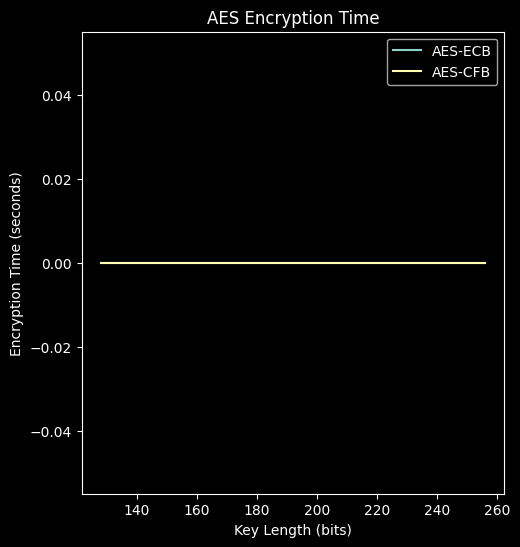

In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(key_lengths, aes_times['ECB'], label='AES-ECB')
plt.plot(key_lengths, aes_times['CFB'], label='AES-CFB')
plt.xlabel('Key Length (bits)')
plt.ylabel('Encryption Time (seconds)')
plt.title('AES Encryption Time')
plt.legend()

# Plot RSA encryption times

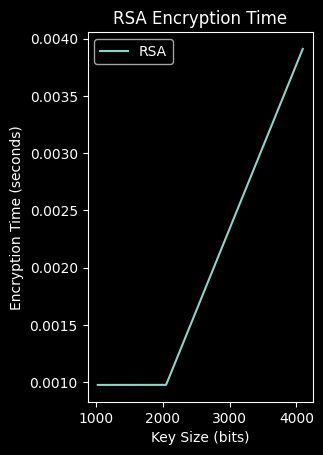

In [16]:
plt.subplot(1, 2, 2)
plt.plot(rsa_key_sizes, rsa_times, label='RSA')
plt.xlabel('Key Size (bits)')
plt.ylabel('Encryption Time (seconds)')
plt.title('RSA Encryption Time')
plt.legend()

# Show plots

In [17]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>